Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


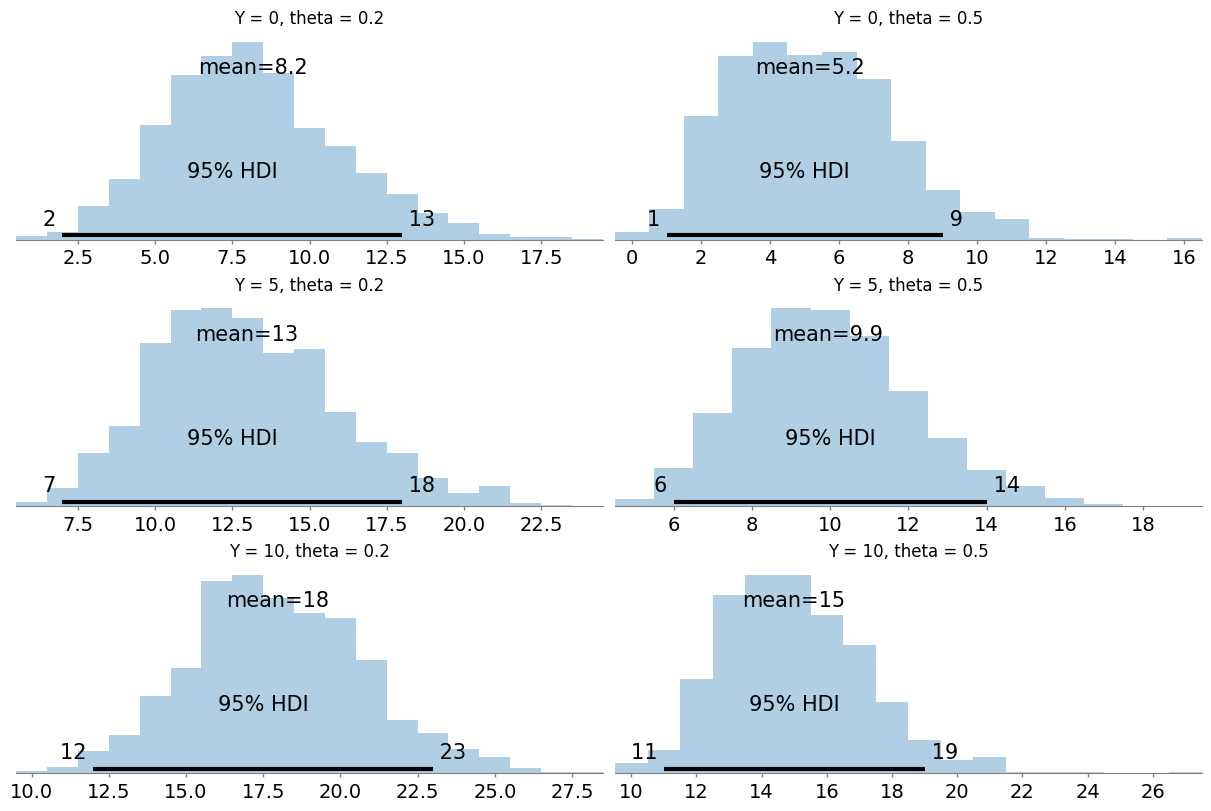

In [5]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8), constrained_layout=True)

for i, Y_observed in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)
            Y = pm.Binomial("Y", n=n, p=theta, observed=Y_observed)
            trace = pm.sample(draws=1000, tune=1000, cores=4, return_inferencedata=True, progressbar = False)
        
        ax = axes[i, j]
        az.plot_posterior(trace, var_names=["n"], hdi_prob=0.95, ax=ax)
        ax.set_title(f"Y = {Y_observed}, theta = {theta}")

plt.show()


# $n \propto \frac{Y}{\theta}$

Pentru a avea $Y$ clienti care cumpara cu o probabilitate $\theta$, $n$ va creste/scade in medie cu a valoare reprezentativa cu cat de greu va fi de face rost de acele $Y$ vanzari in plus.